In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
from networkx.algorithms.approximation import average_clustering
from thinkstats2 import Pmf, thinkplot, Cdf

# Exercise 4.3

In this exercise we consider the actor collaboration data used by Barabasi and Albert in their data. We analyze this actor network by computing the number of actors, the average degree, and by plotting the PMF and the CDF. 

The first cell reads the file and builds the graph. 

In [2]:
import gzip

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j:
                yield u, v

def read_actor_network(filename, n=None):
    G = nx.Graph()
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            if n and i>= n:
                break
    return G

actor = read_actor_network('actor.dat.gz')

n = len(actor)
m = len(actor.edges)

n, m

(382219, 15038094)

We then analyze the average clustering of the distribution. We can estimate the path lengths of the distribution for connected graphs.

Average Clustering is 0.7826


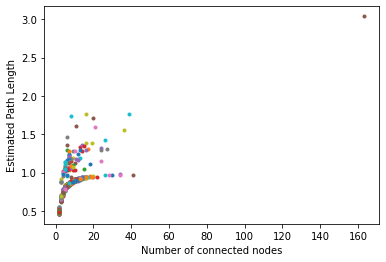

In [5]:
def sample_path_lengths(G, nodes=None, trials=1000):
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair)
              for pair in pairs]
    return lengths

def estimate_path_lengths(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

actor_ac = average_clustering(actor, trials=10000)
print("Average Clustering is", actor_ac)

for nodes in nx.connected_components(actor):
    if len(nodes)<10000:
        plt.plot(len(nodes), estimate_path_lengths(actor, nodes), '.')
        
plt.xlabel("Number of connected nodes")
plt.ylabel("Estimated Path Length")
plt.show()

Since there are some outlier graphs with a lot of nodes, we will then limit our analysis to a maximum of 100 connected nodes. The following is a graph of the distribution. We run the previous code, but this time we only consider until ``len(nodes)=100``:

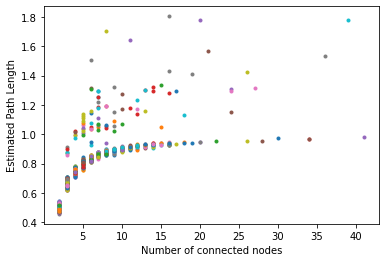

In [6]:
for nodes in nx.connected_components(actor):
    if len(nodes)<100:
        plt.plot(len(nodes), estimate_path_lengths(actor, nodes), '.')
        
plt.xlabel("Number of connected nodes")
plt.ylabel("Estimated Path Length")
plt.show()

Observe that for both large and small connected graphs, the largest path length is about 3.0. This means that the average path length is low. 

We then determine the average degree and standard deviation of the degree distribution.

In [8]:
def degrees(G):
    return [G.degree(u) for u in G]

print("Mean number of degrees:", np.mean(degrees(actor)))
print("Standard deviation: ", np.std(degrees(actor)))

Mean number of degrees: 78.68836452400325
Standard deviation:  163.32613818699565


From the data, the average number of degrees is about 78.7, and the standard deviation is 163.3.

We then plot the probability distribution function (PDF) for actor data to check whether it a heavily-tailed distribution or not. We will be using the ``log_pmf_x`` and ``log_pmf`` functions in the previous exercise *(c.f. ``exercise4_2.ipynb``)*. Recall that

~~~python
def log_pmf(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(this_pmf[i]))
    return log_value

def log_pmf_x(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(i))
    return log_value
~~~

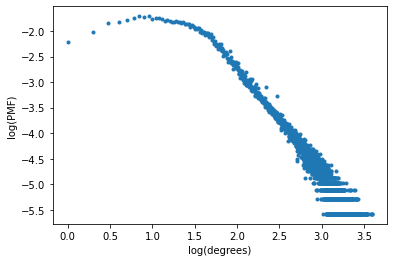

In [9]:
def log_pmf(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(this_pmf[i]))
    return log_value

def log_pmf_x(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(i))
    return log_value

plt.plot(log_pmf_x(actor),log_pmf(actor),'.')
plt.xlabel("log(degrees)")
plt.ylabel("log(PMF)")
plt.show()

The almost straight line distribution at larger values of the ``log(degrees)`` suggests that the ``actor`` distribution is a heavily-tailed distribution. This can be more observed from the cumulative distribution function (CDF) and complementary cumulative distribution function (CCDF), shown below.  

For the CDF, we will be using the functions ``cdf_x`` and ``cdf_y``, which were defined in the previous exercise *(c.f. ``exercise4_2.ipynb``)*:

~~~python
def cdf_x(u):
    return Cdf(degrees(u)).xs

def cdf_y(u):
    return Cdf(degrees(u)).ps
~~~

Then we plotted the CDF for which the $x$ axis is on a log scale. 

In [ ]:
def cdf_x(u):
    return Cdf(degrees(u)).xs

def cdf_y(u):
    return Cdf(degrees(u)).ps

cdf_actor = Cdf(degrees(actor))

plt.plot(cdf_x(actor), cdf_y(actor))
plt.xscale('log')
plt.xlabel('log(degrees)')
plt.ylabel('CDF')
plt.show()

For the CCDF, we will be using the ``thinkplot.cdf`` function from the ``ThinkStats`` module. We set the ``complement=True`` so the plot gives the CCDF instead of the CDF. The code and the plot is shown below:

No handles with labels found to put in legend.


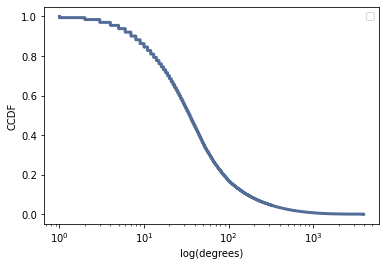

<Figure size 576x432 with 0 Axes>

In [22]:
thinkplot.cdf(cdf_actor, complement=True)
thinkplot.show(xlabel='log(degrees)', ylabel='CCDF',xscale='log',legend='CCDF')

In both the CDF and the CCDF, the curve is almost flat at the range where the ``log(degrees`` is relatively large. This suggests that the distribution is heavily-tailed. 